In [1]:
# Prints the installed versions of Python, NumPy, and PyTorch libraries
import sys
import numpy as np
import torch
print(f"Python Version: {sys.version}")
print(f"NumPy Version: {np.__version__}")
print(f"PyTorch Version: {torch.__version__}")

# Function to check GPU availability and display memory statistics using PyTorch's CUDA interface
def check_gpu_status():
    # Check if GPU is available
    if torch.cuda.is_available():
        print(f"CUDA is available. PyTorch is using GPU.\n")
        # Get the number of available GPUs
        num_gpus = torch.cuda.device_count()
        print(f"Number of GPUs available: {num_gpus}")
        # Loop through each GPU and display its details
        for gpu_id in range(num_gpus):
            gpu_name = torch.cuda.get_device_name(gpu_id)
            gpu_memory_allocated = torch.cuda.memory_allocated(gpu_id) / (1024 ** 3)  # In GB
            gpu_memory_cached = torch.cuda.memory_reserved(gpu_id) / (1024 ** 3)      # In GB
            gpu_memory_total = torch.cuda.get_device_properties(gpu_id).total_memory / (1024 ** 3)  # In GB
            print(f"\nGPU {gpu_id}: {gpu_name}")
            print(f"  Total Memory: {gpu_memory_total:.2f} GB")
            print(f"  Memory Allocated: {gpu_memory_allocated:.2f} GB")
            print(f"  Memory Reserved (Cached): {gpu_memory_cached:.2f} GB")
    else:
        print("CUDA is not available. PyTorch is using the CPU.")

# Run the GPU status check
check_gpu_status()

Python Version: 3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
NumPy Version: 2.1.2
PyTorch Version: 2.7.1+cu118
CUDA is available. PyTorch is using GPU.

Number of GPUs available: 1

GPU 0: NVIDIA GeForce RTX 4070 Laptop GPU
  Total Memory: 8.00 GB
  Memory Allocated: 0.00 GB
  Memory Reserved (Cached): 0.00 GB



Dataset Analysis Report

Dataset Root Path: ../ASD_NET_DATASET

Number of Classes: 4

Classes: Angry+Disgusted, Happy, Neutral, Sad
Angry+Disgusted: 40 images
Happy: 82 images
Neutral: 73 images
Sad: 31 images

Total number of images: 226

Image Dimension Summary:
Width - Min: 3336, Max: 6000, Mean: 5229.18
Height - Min: 2160, Max: 4000, Mean: 3405.71

Image Format Counts: {'MPO': 145, 'JPEG': 81}
Image Color Modes: {'RGB': 226}
File Size (KB) - Min: 1897.08, Max: 11228.95, Mean: 6134.63


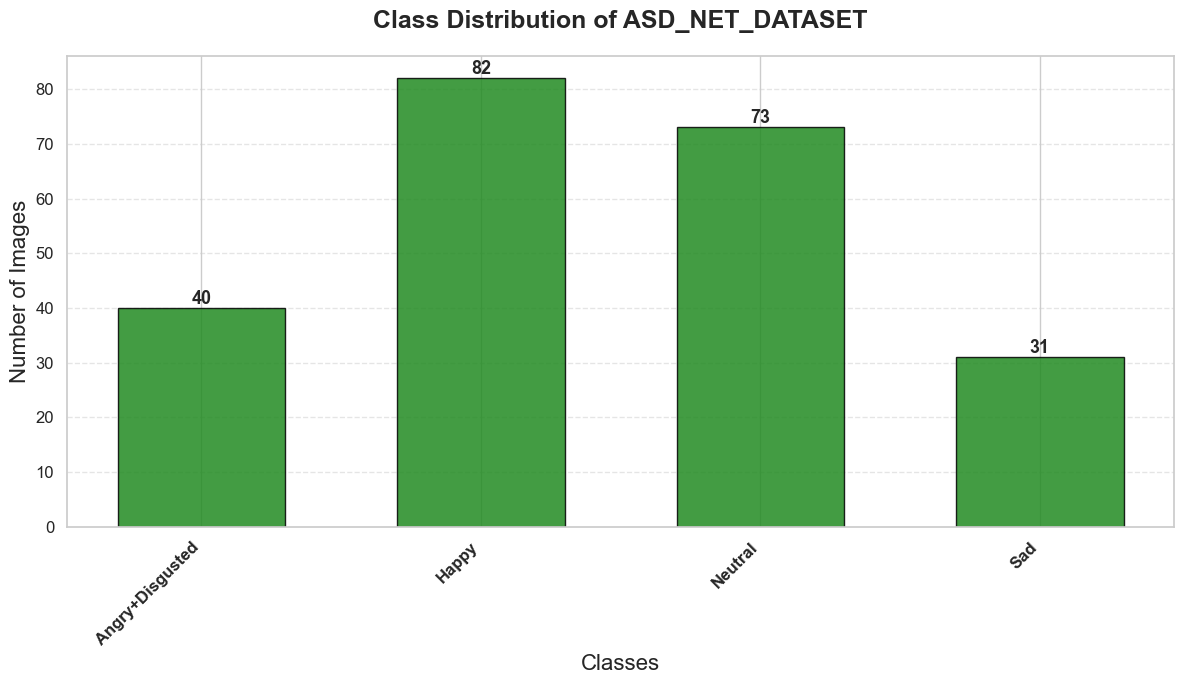

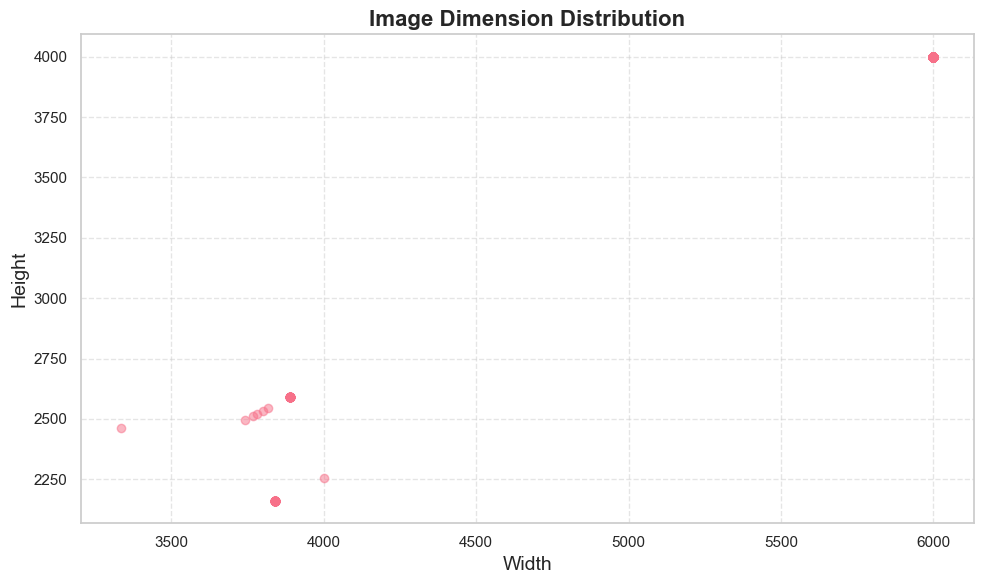

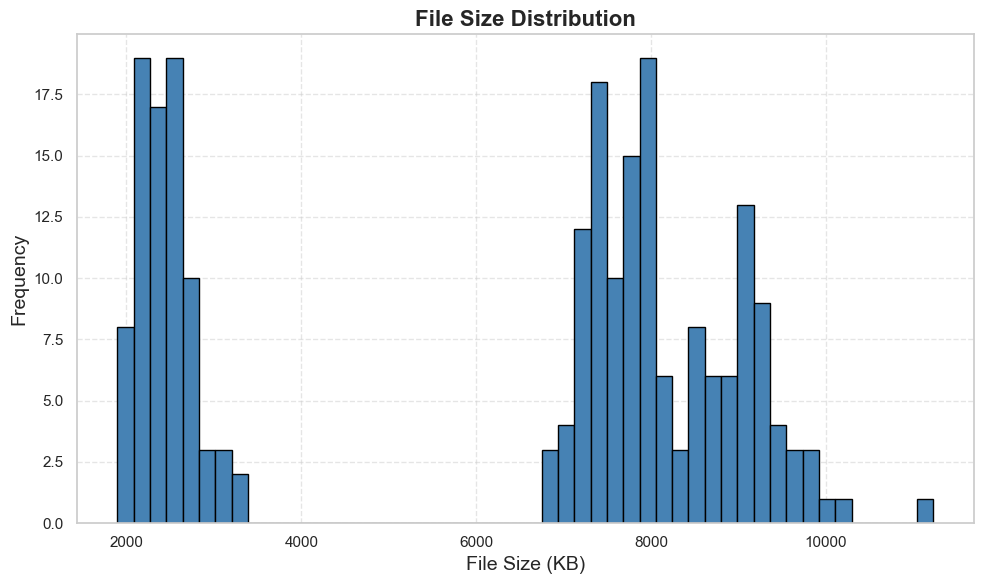

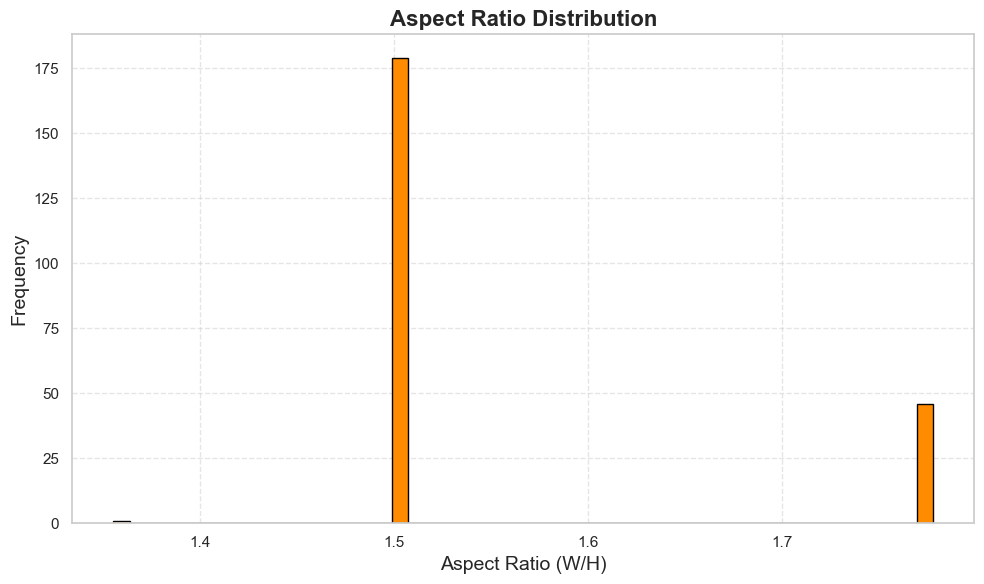

In [4]:
# Written by Ovi
# 2025-07-27
# Dataset analysis with class distribution plot and image statistics

import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from pathlib import Path

def analyze_dataset(dataset_path):
    """
    Analyzes the dataset and prints comprehensive statistics
    """
    print("\n" + "=" * 50)
    print("Dataset Analysis Report")
    print("=" * 50)

    print(f"\nDataset Root Path: {dataset_path}")

    # Get all valid class folders, ignore hidden
    classes = sorted(
        [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')],
        key=lambda x: float(x.replace('class', '')) if x.replace('class', '').isdigit() else x
    )
    print(f"\nNumber of Classes: {len(classes)}")
    print("\nClasses:", ", ".join(classes))

    class_counts = {}
    total_images = 0
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp'}
    image_widths = []
    image_heights = []
    image_formats = Counter()
    image_modes = Counter()
    file_sizes_kb = []

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        files = [f for f in os.listdir(class_path)
                 if os.path.isfile(os.path.join(class_path, f)) and Path(f).suffix.lower() in image_extensions]

        count = len(files)
        class_counts[class_name] = count
        total_images += count

        for f in files:
            fpath = os.path.join(class_path, f)
            try:
                with Image.open(fpath) as img:
                    image_widths.append(img.width)
                    image_heights.append(img.height)
                    image_formats[img.format] += 1
                    image_modes[img.mode] += 1
                    file_sizes_kb.append(os.path.getsize(fpath) / 1024)
            except Exception:
                continue

        print(f"{class_name}: {count} images")

    print(f"\nTotal number of images: {total_images}")

    print("\nImage Dimension Summary:")
    if image_widths and image_heights:
        print(f"Width - Min: {min(image_widths)}, Max: {max(image_widths)}, Mean: {np.mean(image_widths):.2f}")
        print(f"Height - Min: {min(image_heights)}, Max: {max(image_heights)}, Mean: {np.mean(image_heights):.2f}")

    print("\nImage Format Counts:", dict(image_formats))
    print("Image Color Modes:", dict(image_modes))
    print(f"File Size (KB) - Min: {min(file_sizes_kb):.2f}, Max: {max(file_sizes_kb):.2f}, Mean: {np.mean(file_sizes_kb):.2f}")

    # Set clean style
    sns.set_theme(style="whitegrid")  # or "darkgrid", "white", etc.
    sns.set_palette("husl")  # or "deep", "muted", etc.


    # 1. Class Distribution Plot
    plt.figure(figsize=(12, 7))
    bars = plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen', width=0.6, alpha=0.85, edgecolor='black')
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.title('Class Distribution of ASD_NET_DATASET', fontsize=18, fontweight='bold', pad=20)
    plt.ylabel('Number of Images', fontsize=16)
    plt.xlabel('Classes', fontsize=16)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height):,}', ha='center', va='bottom', fontsize=13, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('class_distribution_of_ASD_NET_DATASET.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # 2. Image Width vs Height Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(image_widths, image_heights, alpha=0.5)
    plt.xlabel('Width', fontsize=14)
    plt.ylabel('Height', fontsize=14)
    plt.title('Image Dimension Distribution', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('image_dimension_distribution.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # 3. File Size Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(file_sizes_kb, bins=50, color='steelblue', edgecolor='black')
    plt.xlabel('File Size (KB)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('File Size Distribution', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('file_size_distribution.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # 4. Aspect Ratio Distribution
    aspect_ratios = np.array(image_widths) / np.array(image_heights)
    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=50, color='darkorange', edgecolor='black')
    plt.xlabel('Aspect Ratio (W/H)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Aspect Ratio Distribution', fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('aspect_ratio_distribution.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    print("\n" + "=" * 50)

if __name__ == "__main__":
    dataset_path = "../ASD_NET_DATASET"
    analyze_dataset(dataset_path)


Saved combined grid image at 'asd_expression_grid.png'


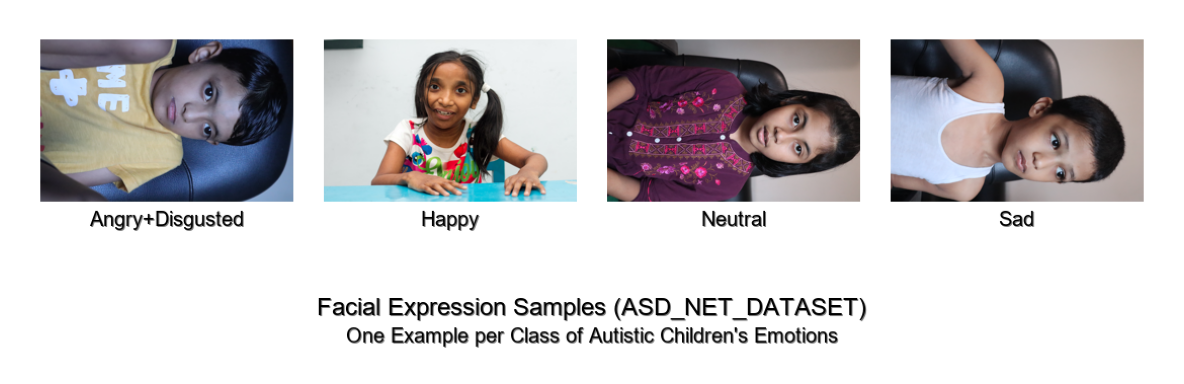

In [6]:
# Written by Ovi
# 2025-07-27
# Generate a grid of facial expression samples from ASD_NET_DATASET

import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import re

def natural_sort_key(s):
    """Function to sort strings with numbers naturally"""
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split('([0-9]+)', s)]

def generate_and_display_combined_grid_image(
    dataset_path='../ASD_NET_DATASET',
    output_file='asd_expression_grid.png',
    grid_size=(1, 4),  # 1 row, 4 columns for 4 classes
    image_size=(250, 160),  # Landscape format for facial images
    padding=30,
    caption_padding=40
):
    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    class_dirs.sort(key=natural_sort_key)

    if len(class_dirs) < grid_size[0] * grid_size[1]:
        print("Not enough classes to fill the entire grid.")
        return

    selected_images = []
    class_names = []

    for class_name in class_dirs:
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.mpo'))]

        if not images:
            print(f"No images found in class '{class_name}', skipping.")
            continue

        random_image_path = os.path.join(class_path, random.choice(images))
        image = Image.open(random_image_path)

        if image.size[1] > image.size[0]:
            image = image.rotate(270, expand=True)
        image = image.resize(image_size)

        selected_images.append(image)
        class_names.append(class_name)

        if len(selected_images) == grid_size[0] * grid_size[1]:
            break

    total_width = grid_size[1] * image_size[0] + (grid_size[1] + 1) * padding
    title_height = 100
    total_height = grid_size[0] * (image_size[1] + caption_padding) + (grid_size[0] + 1) * padding + title_height

    grid_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))
    draw = ImageDraw.Draw(grid_image)

    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)
        title_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
    except IOError:
        try:
            font = ImageFont.truetype("arial.ttf", 20)
            title_font = ImageFont.truetype("arial.ttf", 24)
        except IOError:
            font = ImageFont.load_default()
            title_font = ImageFont.load_default()

    for idx, (image, class_name) in enumerate(zip(selected_images, class_names)):
        row = idx // grid_size[1]
        col = idx % grid_size[1]

        x_offset = padding + col * (image_size[0] + padding)
        y_offset = padding + row * (image_size[1] + caption_padding + padding)

        grid_image.paste(image, (x_offset, y_offset))

        # Draw expression label (e.g., "Angry+Disgusted")
        text = class_name
        if hasattr(draw, 'textlength'):
            text_width = draw.textlength(text, font=font)
        else:
            text_width = draw.textsize(text, font=font)[0]

        text_x = x_offset + (image_size[0] - text_width) // 2
        text_y = y_offset + image_size[1] + 5

        draw.text((text_x+1, text_y+1), text, fill="gray", font=font)
        draw.text((text_x, text_y), text, fill="black", font=font)

    main_title = "Facial Expression Samples (ASD_NET_DATASET)"
    subtitle = "One Example per Class of Autistic Children's Emotions"

    if hasattr(draw, 'textlength'):
        main_title_width = draw.textlength(main_title, font=title_font)
        subtitle_width = draw.textlength(subtitle, font=font)
    else:
        main_title_width = draw.textsize(main_title, font=title_font)[0]
        subtitle_width = draw.textsize(subtitle, font=font)[0]

    main_title_x = (total_width - main_title_width) // 2
    subtitle_x = (total_width - subtitle_width) // 2
    main_title_y = total_height - title_height + 20
    subtitle_y = main_title_y + 30

    draw.text((main_title_x+1, main_title_y+1), main_title, fill="gray", font=title_font)
    draw.text((main_title_x, main_title_y), main_title, fill="black", font=title_font)
    draw.text((subtitle_x+1, subtitle_y+1), subtitle, fill="gray", font=font)
    draw.text((subtitle_x, subtitle_y), subtitle, fill="black", font=font)

    grid_image.save(output_file, quality=95, dpi=(300, 300))
    print(f"Saved combined grid image at '{output_file}'")

    plt.figure(figsize=(12, 5))
    plt.imshow(grid_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    generate_and_display_combined_grid_image()


In [7]:
# Written by Ovi
# 2025-07-27
# Code to split ASD_NET_DATASET into train, validation, and test sets, with detailed analysis and logging

import os
import random
import shutil

# Paths
original_dataset = '../ASD_NET_DATASET'  # Your original dataset directory
split_base_dir = '../ASD_NET_SPLIT_70'   # Where to store the train/val/test splits

# Split ratios
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

def create_dir_structure(base_dir, class_names):
    """Create train, val, and test directories for each class."""
    for split in ['train', 'val', 'test']:
        for class_name in class_names:
            os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

def analyze_and_split_dataset(original_dataset, split_base_dir):
    """Analyze and split ASD_NET_DATASET into train, val, and test."""
    class_names = sorted([
        d for d in os.listdir(original_dataset)
        if os.path.isdir(os.path.join(original_dataset, d)) and not d.startswith('.')
    ])
    create_dir_structure(split_base_dir, class_names)

    total_images = 0
    split_summary = {}

    for class_name in class_names:
        class_path = os.path.join(original_dataset, class_name)

        if os.path.isdir(class_path):
            image_files = [
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ]
            random.shuffle(image_files)

            total_images_in_class = len(image_files)
            train_end = int(total_images_in_class * TRAIN_RATIO)
            val_end = train_end + int(total_images_in_class * VAL_RATIO)

            train_files = image_files[:train_end]
            val_files = image_files[train_end:val_end]
            test_files = image_files[val_end:]

            for f in train_files:
                shutil.copy(os.path.join(class_path, f), os.path.join(split_base_dir, 'train', class_name, f))
            for f in val_files:
                shutil.copy(os.path.join(class_path, f), os.path.join(split_base_dir, 'val', class_name, f))
            for f in test_files:
                shutil.copy(os.path.join(class_path, f), os.path.join(split_base_dir, 'test', class_name, f))

            split_summary[class_name] = {
                'Total': total_images_in_class,
                'Train': len(train_files),
                'Validation': len(val_files),
                'Test': len(test_files)
            }

            total_images += total_images_in_class

            print(f"{class_name}: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test (Total: {total_images_in_class})")

    print("\nOverall Dataset Summary:")
    print(f"Total Images: {total_images}")
    print(f"Train Ratio: {TRAIN_RATIO}, Validation Ratio: {VAL_RATIO}, Test Ratio: {TEST_RATIO}\n")

    print("Detailed Split Summary:")
    for class_name, counts in split_summary.items():
        print(f"{class_name} - Total: {counts['Total']}, Train: {counts['Train']}, Val: {counts['Validation']}, Test: {counts['Test']}")

    return split_summary

if __name__ == "__main__":
    dataset_summary = analyze_and_split_dataset(original_dataset, split_base_dir)


Angry+Disgusted: 28 train, 6 val, 6 test (Total: 40)
Happy: 57 train, 12 val, 13 test (Total: 82)
Neutral: 51 train, 10 val, 12 test (Total: 73)
Sad: 21 train, 4 val, 6 test (Total: 31)

Overall Dataset Summary:
Total Images: 226
Train Ratio: 0.7, Validation Ratio: 0.15, Test Ratio: 0.15

Detailed Split Summary:
Angry+Disgusted - Total: 40, Train: 28, Val: 6, Test: 6
Happy - Total: 82, Train: 57, Val: 12, Test: 13
Neutral - Total: 73, Train: 51, Val: 10, Test: 12
Sad - Total: 31, Train: 21, Val: 4, Test: 6


In [8]:
# Written by Ovi
# 2025-07-27
# Code to apply safe facial augmentations to pre-split ASD_NET_DATASET

import os
from PIL import Image
from torchvision import transforms
import shutil
from tqdm import tqdm

# Paths
split_base_dir = '../ASD_NET_SPLIT_70'              # Input: pre-split dataset
augmented_data_dir = '../ASD_NET_SPLIT_70_AUG10X'   # Output: augmented dataset

# Number of augmentations per image
NUM_AUGMENTATIONS = 10

# Define conservative augmentations suitable for facial expressions
augmentation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.95, 1.05))
])

def apply_augmentations():
    """Apply facial-safe augmentations to ASD_NET_DATASET splits."""
    print("\n=== Starting Augmentation Process for ASD Facial Expressions ===")
    
    # Create output directories
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(augmented_data_dir, split)
        os.makedirs(split_path, exist_ok=True)
        for class_name in os.listdir(os.path.join(split_base_dir, split)):
            os.makedirs(os.path.join(split_path, class_name), exist_ok=True)

    stats = {'train': {}, 'val': {}, 'test': {}}

    for split in ['train', 'val', 'test']:
        print(f"\nProcessing {split.upper()} split...")
        split_source = os.path.join(split_base_dir, split)
        split_dest = os.path.join(augmented_data_dir, split)

        for class_name in sorted(os.listdir(split_source)):
            class_source = os.path.join(split_source, class_name)
            class_dest = os.path.join(split_dest, class_name)

            if not os.path.isdir(class_source):
                continue

            original_files = [
                f for f in os.listdir(class_source)
                if os.path.isfile(os.path.join(class_source, f))
            ]

            print(f"\nClass '{class_name}': {len(original_files)} original images")

            # Copy originals
            for file in tqdm(original_files, desc="Copying originals"):
                shutil.copy2(os.path.join(class_source, file),
                             os.path.join(class_dest, file))

            # Apply augmentations
            print("Generating augmented images...")
            for file in tqdm(original_files, desc="Generating augmentations"):
                img_path = os.path.join(class_source, file)
                try:
                    with Image.open(img_path) as img:
                        if img.mode != 'RGB':
                            img = img.convert('RGB')
                        for i in range(NUM_AUGMENTATIONS):
                            try:
                                aug_img = augmentation_transforms(img)
                                base_name = os.path.splitext(file)[0]
                                aug_name = f"{base_name}_aug_{i+1}.jpg"
                                aug_img.save(os.path.join(class_dest, aug_name))
                            except Exception as e:
                                print(f"Error augmenting {file} (aug {i+1}): {e}")
                except Exception as e:
                    print(f"Error opening {file}: {e}")

            # Log class stats
            stats[split][class_name] = {
                'original': len(original_files),
                'augmented': len(original_files) * NUM_AUGMENTATIONS,
                'total': len(original_files) * (1 + NUM_AUGMENTATIONS)
            }

    # Print summary
    print("\n=== Augmentation Summary ===")
    for split in ['train', 'val', 'test']:
        print(f"\n{split.upper()} Split:")
        total_orig, total_aug = 0, 0
        for cls, stat in stats[split].items():
            print(f"  {cls}: {stat['original']} original, {stat['augmented']} augmented, {stat['total']} total")
            total_orig += stat['original']
            total_aug += stat['augmented']
        print(f"  Total Original: {total_orig}")
        print(f"  Total Augmented: {total_aug}")
        print(f"  Total Combined: {total_orig + total_aug}")

    all_orig = sum(sum(c['original'] for c in s.values()) for s in stats.values())
    all_aug = sum(sum(c['augmented'] for c in s.values()) for s in stats.values())
    print("\nOverall Dataset:")
    print(f"  Original Images: {all_orig}")
    print(f"  Augmented Images: {all_aug}")
    print(f"  Final Total: {all_orig + all_aug}")

if __name__ == "__main__":
    apply_augmentations()



=== Starting Augmentation Process for ASD Facial Expressions ===

Processing TRAIN split...

Class 'Angry+Disgusted': 28 original images


Copying originals: 100%|██████████| 28/28 [00:00<00:00, 62.54it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 28/28 [00:11<00:00,  2.33it/s]



Class 'Happy': 57 original images


Copying originals: 100%|██████████| 57/57 [00:00<00:00, 68.16it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 57/57 [00:21<00:00,  2.67it/s]



Class 'Neutral': 51 original images


Copying originals: 100%|██████████| 51/51 [00:00<00:00, 69.78it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 51/51 [00:17<00:00,  2.88it/s]



Class 'Sad': 21 original images


Copying originals: 100%|██████████| 21/21 [00:00<00:00, 67.95it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 21/21 [00:08<00:00,  2.43it/s]



Processing VAL split...

Class 'Angry+Disgusted': 6 original images


Copying originals: 100%|██████████| 6/6 [00:00<00:00, 64.88it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]



Class 'Happy': 12 original images


Copying originals: 100%|██████████| 12/12 [00:00<00:00, 64.10it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]



Class 'Neutral': 10 original images


Copying originals: 100%|██████████| 10/10 [00:00<00:00, 61.94it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]



Class 'Sad': 4 original images


Copying originals: 100%|██████████| 4/4 [00:00<00:00, 53.66it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]



Processing TEST split...

Class 'Angry+Disgusted': 6 original images


Copying originals: 100%|██████████| 6/6 [00:00<00:00, 62.58it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]



Class 'Happy': 13 original images


Copying originals: 100%|██████████| 13/13 [00:00<00:00, 70.38it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 13/13 [00:04<00:00,  2.80it/s]



Class 'Neutral': 12 original images


Copying originals: 100%|██████████| 12/12 [00:00<00:00, 66.53it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]



Class 'Sad': 6 original images


Copying originals: 100%|██████████| 6/6 [00:00<00:00, 59.44it/s]


Generating augmented images...


Generating augmentations: 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]


=== Augmentation Summary ===

TRAIN Split:
  Angry+Disgusted: 28 original, 280 augmented, 308 total
  Happy: 57 original, 570 augmented, 627 total
  Neutral: 51 original, 510 augmented, 561 total
  Sad: 21 original, 210 augmented, 231 total
  Total Original: 157
  Total Augmented: 1570
  Total Combined: 1727

VAL Split:
  Angry+Disgusted: 6 original, 60 augmented, 66 total
  Happy: 12 original, 120 augmented, 132 total
  Neutral: 10 original, 100 augmented, 110 total
  Sad: 4 original, 40 augmented, 44 total
  Total Original: 32
  Total Augmented: 320
  Total Combined: 352

TEST Split:
  Angry+Disgusted: 6 original, 60 augmented, 66 total
  Happy: 13 original, 130 augmented, 143 total
  Neutral: 12 original, 120 augmented, 132 total
  Sad: 6 original, 60 augmented, 66 total
  Total Original: 37
  Total Augmented: 370
  Total Combined: 407

Overall Dataset:
  Original Images: 226
  Augmented Images: 2260
  Final Total: 2486


In [9]:
# Written by Ovi
# 2025-07-27
# Code to apply safe facial augmentations (25x) to ASD_NET_DATASET splits

import os
from PIL import Image
from torchvision import transforms
import shutil
from tqdm import tqdm

# Paths
split_base_dir = '../ASD_NET_SPLIT_70'                # Input: pre-split dataset
augmented_data_dir = '../ASD_NET_SPLIT_70_AUG25X'     # Output: 25x augmented dataset

# Number of augmentations per image
NUM_AUGMENTATIONS = 25

# Define safe augmentations for facial data
augmentation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.95, 1.05))
])

def apply_augmentations():
    """Apply facial-safe augmentations to ASD_NET_DATASET splits."""
    print("\n=== Starting 25x Augmentation for ASD Facial Expressions ===")
    
    # Create destination structure
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(augmented_data_dir, split)
        os.makedirs(split_path, exist_ok=True)
        for class_name in os.listdir(os.path.join(split_base_dir, split)):
            os.makedirs(os.path.join(split_path, class_name), exist_ok=True)

    stats = {'train': {}, 'val': {}, 'test': {}}

    for split in ['train', 'val', 'test']:
        print(f"\nProcessing {split.upper()} split...")
        split_source = os.path.join(split_base_dir, split)
        split_dest = os.path.join(augmented_data_dir, split)

        for class_name in sorted(os.listdir(split_source)):
            class_source = os.path.join(split_source, class_name)
            class_dest = os.path.join(split_dest, class_name)

            if not os.path.isdir(class_source):
                continue

            original_files = [
                f for f in os.listdir(class_source)
                if os.path.isfile(os.path.join(class_source, f))
            ]

            print(f"\nClass '{class_name}': {len(original_files)} original images")

            # Copy originals
            for file in tqdm(original_files, desc="Copying originals"):
                shutil.copy2(os.path.join(class_source, file),
                             os.path.join(class_dest, file))

            # Generate augmentations
            print("Generating augmented images...")
            for file in tqdm(original_files, desc="Generating 25x augmentations"):
                img_path = os.path.join(class_source, file)
                try:
                    with Image.open(img_path) as img:
                        if img.mode != 'RGB':
                            img = img.convert('RGB')
                        for i in range(NUM_AUGMENTATIONS):
                            try:
                                aug_img = augmentation_transforms(img)
                                base_name = os.path.splitext(file)[0]
                                aug_name = f"{base_name}_aug_{i+1}.jpg"
                                aug_img.save(os.path.join(class_dest, aug_name))
                            except Exception as e:
                                print(f"Error augmenting {file} (aug {i+1}): {e}")
                except Exception as e:
                    print(f"Error opening {file}: {e}")

            stats[split][class_name] = {
                'original': len(original_files),
                'augmented': len(original_files) * NUM_AUGMENTATIONS,
                'total': len(original_files) * (1 + NUM_AUGMENTATIONS)
            }

    # Summary
    print("\n=== Augmentation Summary ===")
    for split in ['train', 'val', 'test']:
        print(f"\n{split.upper()} Split:")
        total_orig, total_aug = 0, 0
        for cls, stat in stats[split].items():
            print(f"  {cls}: {stat['original']} original, {stat['augmented']} augmented, {stat['total']} total")
            total_orig += stat['original']
            total_aug += stat['augmented']
        print(f"  Total Original: {total_orig}")
        print(f"  Total Augmented: {total_aug}")
        print(f"  Total Combined: {total_orig + total_aug}")

    all_orig = sum(sum(c['original'] for c in s.values()) for s in stats.values())
    all_aug = sum(sum(c['augmented'] for c in s.values()) for s in stats.values())
    print("\nOverall Dataset:")
    print(f"  Original Images: {all_orig}")
    print(f"  Augmented Images: {all_aug}")
    print(f"  Final Total: {all_orig + all_aug}")

if __name__ == "__main__":
    apply_augmentations()



=== Starting 25x Augmentation for ASD Facial Expressions ===

Processing TRAIN split...

Class 'Angry+Disgusted': 28 original images


Copying originals: 100%|██████████| 28/28 [00:00<00:00, 306.43it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 28/28 [00:26<00:00,  1.07it/s]



Class 'Happy': 57 original images


Copying originals: 100%|██████████| 57/57 [00:00<00:00, 322.85it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 57/57 [00:45<00:00,  1.24it/s]



Class 'Neutral': 51 original images


Copying originals: 100%|██████████| 51/51 [00:00<00:00, 323.75it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 51/51 [00:38<00:00,  1.33it/s]



Class 'Sad': 21 original images


Copying originals: 100%|██████████| 21/21 [00:00<00:00, 288.24it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 21/21 [00:18<00:00,  1.16it/s]



Processing VAL split...

Class 'Angry+Disgusted': 6 original images


Copying originals: 100%|██████████| 6/6 [00:00<00:00, 260.53it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]



Class 'Happy': 12 original images


Copying originals: 100%|██████████| 12/12 [00:00<00:00, 308.29it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]



Class 'Neutral': 10 original images


Copying originals: 100%|██████████| 10/10 [00:00<00:00, 354.52it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]



Class 'Sad': 4 original images


Copying originals: 100%|██████████| 4/4 [00:00<00:00, 318.90it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]



Processing TEST split...

Class 'Angry+Disgusted': 6 original images


Copying originals: 100%|██████████| 6/6 [00:00<00:00, 249.89it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]



Class 'Happy': 13 original images


Copying originals: 100%|██████████| 13/13 [00:00<00:00, 233.86it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]



Class 'Neutral': 12 original images


Copying originals: 100%|██████████| 12/12 [00:00<00:00, 298.42it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 12/12 [00:10<00:00,  1.18it/s]



Class 'Sad': 6 original images


Copying originals: 100%|██████████| 6/6 [00:00<00:00, 306.99it/s]


Generating augmented images...


Generating 25x augmentations: 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]


=== Augmentation Summary ===

TRAIN Split:
  Angry+Disgusted: 28 original, 700 augmented, 728 total
  Happy: 57 original, 1425 augmented, 1482 total
  Neutral: 51 original, 1275 augmented, 1326 total
  Sad: 21 original, 525 augmented, 546 total
  Total Original: 157
  Total Augmented: 3925
  Total Combined: 4082

VAL Split:
  Angry+Disgusted: 6 original, 150 augmented, 156 total
  Happy: 12 original, 300 augmented, 312 total
  Neutral: 10 original, 250 augmented, 260 total
  Sad: 4 original, 100 augmented, 104 total
  Total Original: 32
  Total Augmented: 800
  Total Combined: 832

TEST Split:
  Angry+Disgusted: 6 original, 150 augmented, 156 total
  Happy: 13 original, 325 augmented, 338 total
  Neutral: 12 original, 300 augmented, 312 total
  Sad: 6 original, 150 augmented, 156 total
  Total Original: 37
  Total Augmented: 925
  Total Combined: 962

Overall Dataset:
  Original Images: 226
  Augmented Images: 5650
  Final Total: 5876


In [ ]:
# Written by Ovi
# 2025-07-27
# Image classification pipeline using VGG16
# Adapted for emotion classification dataset

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import time
import numpy as np
import random
from itertools import cycle
from sklearn.preprocessing import label_binarize
from torch.utils.data import DataLoader
import os

# Ensure reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger(__name__)

# Hyperparameters
batch_sizes = [16, 32, 64]  # Adjusted for smaller dataset
learning_rates = [5e-5, 1e-4, 3e-4, 5e-4, 1e-3]
epoch_counts = [25, 50]
NUM_CLASSES = 4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data from ../ASD_NET_SPLIT_70_AUG25X
data_dir = "../ASD_NET_SPLIT_70_AUG25X"
input_size = (224, 224)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), transform)
    for x in ['train', 'val', 'test']
}

pipeline_data = {
    'train_loader': DataLoader(image_datasets['train'], batch_size=32, shuffle=True, num_workers=2),
    'val_loader': DataLoader(image_datasets['val'], batch_size=32, shuffle=False, num_workers=2),
    'test_loader': DataLoader(image_datasets['test'], batch_size=32, shuffle=False, num_workers=2),
    'class_names': image_datasets['train'].classes
}

# Use the existing pipeline data loaders
def train_with_existing_pipeline(pipeline_data):
    train_loader = pipeline_data['train_loader']
    val_loader = pipeline_data['val_loader']
    test_loader = pipeline_data['test_loader']
    class_names = pipeline_data['class_names']
    
    logger.info(f"Training dataset size: {len(train_loader.dataset)}")
    logger.info(f"Validation dataset size: {len(val_loader.dataset)}")
    logger.info(f"Test dataset size: {len(test_loader.dataset)}")
    
    def train_and_validate(model, train_loader, val_loader, criterion, optimizer, epochs):
        train_acc_history, val_acc_history = [], []
        train_loss_history, val_loss_history = [], []
        total_training_time = 0
        for epoch in range(epochs):
            epoch_start_time = time.time()
            model.train()
            train_loss = 0
            train_correct = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                train_correct += torch.sum(preds == labels.data)

            train_loss /= len(train_loader.dataset)
            train_acc = train_correct.double() / len(train_loader.dataset)
            train_loss_history.append(train_loss)
            train_acc_history.append(train_acc.cpu())

            logger.info(f"Epoch {epoch + 1}/{epochs} - Training: Loss = {train_loss:.4f}, Accuracy = {train_acc:.4f}")

            model.eval()
            val_loss = 0
            val_correct = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    val_loss += loss.item() * inputs.size(0)
                    _, preds = torch.max(outputs, 1)
                    val_correct += torch.sum(preds == labels.data)

            val_loss /= len(val_loader.dataset)
            val_acc = val_correct.double() / len(val_loader.dataset)
            val_loss_history.append(val_loss)
            val_acc_history.append(val_acc.cpu())

            epoch_time = time.time() - epoch_start_time
            total_training_time += epoch_time

            logger.info(f"Epoch {epoch + 1}/{epochs} - Validation: Loss = {val_loss:.4f}, Accuracy = {val_acc:.4f}")
            logger.info(f"Time for epoch {epoch + 1}: {epoch_time:.2f}s")

        logger.info(f"Total Training Time: {total_training_time:.2f}s")

        return train_acc_history, val_acc_history, train_loss_history, val_loss_history

    for batch_size in batch_sizes:
        for lr in learning_rates:
            for epochs in epoch_counts:
                logger.info(f"Training with Batch Size: {batch_size}, Learning Rate: {lr}, Epochs: {epochs}")

                model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
                for param in model.features.parameters():
                    param.requires_grad = False
                model.classifier[6] = nn.Linear(model.classifier[6].in_features, NUM_CLASSES)
                model = model.to(DEVICE)

                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)

                train_acc_history, val_acc_history, train_loss_history, val_loss_history = train_and_validate(
                    model, train_loader, val_loader, criterion, optimizer, epochs
                )

                epochs_range = range(1, epochs + 1)
                plt.figure()
                plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
                plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
                plt.title(f'Emotion Classification VGG16 Accuracy (Batch Size {batch_size}, LR {lr}, Epochs {epochs})')
                plt.legend()
                plt.savefig(f'emotion_vgg16_accuracy_batch_{batch_size}_lr_{lr}_epochs_{epochs}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
                plt.close()

                plt.figure()
                plt.plot(epochs_range, train_loss_history, label='Training Loss')
                plt.plot(epochs_range, val_loss_history, label='Validation Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title(f'Emotion Classification VGG16 Loss (Batch Size {batch_size}, LR {lr}, Epochs {epochs})')
                plt.legend()
                plt.savefig(f'emotion_vgg16_loss_batch_{batch_size}_lr_{lr}_epochs_{epochs}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
                plt.close()

                def test_and_evaluate(model, test_loader, class_names):
                    model.eval()
                    all_labels = []
                    all_preds = []

                    with torch.no_grad():
                        for inputs, labels in test_loader:
                            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                            outputs = model(inputs)
                            _, preds = torch.max(outputs, 1)
                            all_labels.extend(labels.cpu().numpy())
                            all_preds.extend(preds.cpu().numpy())

                    macro_f1 = f1_score(all_labels, all_preds, average='macro')
                    logger.info(f"Macro-Averaged F1 Score: {macro_f1:.4f}")

                    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None, labels=np.unique(all_labels))
                    metrics_df = np.array([precision, recall, f1]).T
                    plt.figure(figsize=(8, 6))
                    sns.heatmap(metrics_df, annot=True, cmap="viridis", xticklabels=["Precision", "Recall", "F1"], yticklabels=class_names)
                    plt.title("Emotion Classification VGG16 Classification Report")
                    plt.xlabel("Metric")
                    plt.ylabel("Class")
                    plt.savefig('emotion_vgg16_classification_report.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
                    plt.close()

                    cm = confusion_matrix(all_labels, all_preds)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
                    plt.xlabel("Predicted Label")
                    plt.ylabel("True Label")
                    plt.title("Emotion Classification VGG16 Confusion Matrix")
                    plt.savefig('emotion_vgg16_confusion_matrix.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
                    plt.close()

                    all_labels_binarized = label_binarize(all_labels, classes=np.arange(NUM_CLASSES))
                    all_preds_binarized = np.eye(NUM_CLASSES)[np.array(all_preds)]

                    plt.figure(figsize=(10, 8))
                    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
                    for i, color in zip(range(NUM_CLASSES), colors):
                        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_preds_binarized[:, i])
                        roc_auc = auc(fpr, tpr)
                        plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

                    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                    plt.xlabel('False Positive Rate')
                    plt.ylabel('True Positive Rate')
                    plt.title('Emotion Classification VGG16 ROC Curves for All Classes')
                    plt.legend(loc="lower right")
                    plt.savefig('emotion_vgg16_ROC_All_Classes.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
                    plt.close()

                test_and_evaluate(model, test_loader, class_names=class_names)

                torch.save(model.state_dict(), 'emotion_vgg16_model_trained.pth')

if __name__ == "__main__":
    train_with_existing_pipeline(pipeline_data)


2025-07-26 21:03:27,655 - Training dataset size: 4082
2025-07-26 21:03:27,656 - Validation dataset size: 832
2025-07-26 21:03:27,656 - Test dataset size: 962
2025-07-26 21:03:27,657 - Training with Batch Size: 16, Learning Rate: 5e-05, Epochs: 25
